# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
app_train.groupby(['CNT_CHILDREN']).size()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

In [5]:
"""
CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
Your code here
"""
# 第1種cut方法
cut_rule = pd.IntervalIndex.from_tuples([(-1, 0),(0, 2),(2, 5),(5, 20)])

In [6]:
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1, 0]    215371
(0, 2]      87868
(2, 5]       4230
(5, 20]        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [7]:
# 用第2種Cut的方法來區分資料
cut_rule2 = [-1, 0, 2, 5, 100]

In [8]:
app_train['CNT_CHILDREN_GROUP2'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule2, include_lowest=True,labels=["0", "1~2", "3~5",">5"])
app_train['CNT_CHILDREN_GROUP2'].value_counts()

0      215371
1~2     87868
3~5      4230
>5         42
Name: CNT_CHILDREN_GROUP2, dtype: int64

In [9]:
#2-1
"""
請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
Your code here
"""
grp = ['CNT_CHILDREN_GROUP2','TARGET']

In [10]:
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP2  TARGET
0                    0         166747.010980
                     1         160804.210548
1~2                  0         174590.584401
                     1         176115.362720
3~5                  0         175053.742913
                     1         160677.385714
>5                   0         139159.090909
                     1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [11]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP2', 'TARGET']

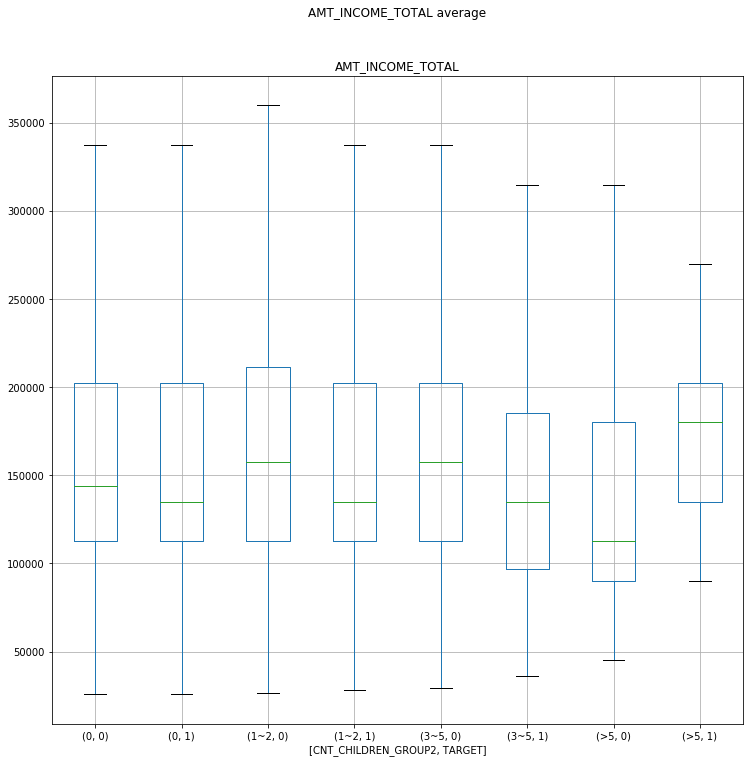

In [12]:
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('AMT_INCOME_TOTAL average')
plt.show()

In [13]:
#3
"""
請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
Your code here
"""

# 在lambda演算中，函式被認為是第一類物件，因此函式可以當作輸入，或作為其它函式的輸出返回。
# Hint：zscore = lambda x: (x - x.mean()) / x.std()

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x - x.mean()) / x.std())

app_train[['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head(50)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,1,0,202500.000,0.491521
1,0,0,270000.000,0.972434
2,0,0,67500.000,-0.934706
3,0,0,135000.000,-0.298993
4,0,0,121500.000,-0.426135
5,0,0,99000.000,-0.638040
6,0,1,171000.000,-0.029872
7,0,0,360000.000,1.820052
8,0,0,112500.000,-0.510897
9,0,0,135000.000,-0.298993
